<a href="https://colab.research.google.com/github/MastersMasterM/Digit-Recognizer/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using kaggle API to download data

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c digit-recognizer

 72% 11.0M/15.3M [00:00<00:00, 115MB/s]
100% 15.3M/15.3M [00:00<00:00, 133MB/s]


In [2]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
df = pd.read_csv("/content/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

# Splitting X & Y

In [6]:
X = df.iloc[:,1:]
X = X/255.0
y = df.iloc[:,0:1]

# Plotting an example

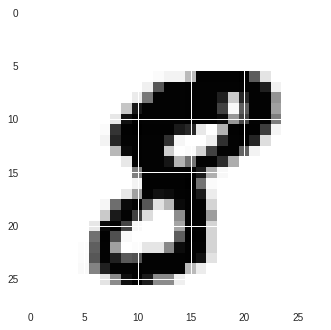

In [7]:
ex_img = np.array(X.iloc[10,:].values)
ex_img = ex_img.reshape((28,28))
plt.imshow(ex_img)

# Reshaping

In order to be able to use Convolutional layer in keras we have to adjust the dimensition

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
X = X.values.reshape(-1,28,28,1)

# Creating Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [10]:
model.compile('Adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Training model

In [11]:
history = model.fit(X,y,validation_split=0.2, batch_size=20, epochs=50)

Epoch 1/50
1680/1680 [==============================] - 37s 20ms/step - loss: 0.6273 - accuracy: 0.7884 - val_loss: 0.2013 - val_accuracy: 0.9408
Epoch 2/50
1680/1680 [==============================] - 35s 21ms/step - loss: 0.2534 - accuracy: 0.9208 - val_loss: 0.0905 - val_accuracy: 0.9701
Epoch 3/50
1680/1680 [==============================] - 35s 21ms/step - loss: 0.1969 - accuracy: 0.9390 - val_loss: 0.0995 - val_accuracy: 0.9707
Epoch 4/50
1680/1680 [==============================] - 36s 21ms/step - loss: 0.1611 - accuracy: 0.9510 - val_loss: 0.0732 - val_accuracy: 0.9777
Epoch 5/50
1680/1680 [==============================] - 34s 20ms/step - loss: 0.1369 - accuracy: 0.9594 - val_loss: 0.0703 - val_accuracy: 0.9802
Epoch 6/50
1680/1680 [==============================] - 36s 22ms/step - loss: 0.1326 - accuracy: 0.9595 - val_loss: 0.0556 - val_accuracy: 0.9837
Epoch 7/50
1680/1680 [==============================] - 34s 20ms/step - loss: 0.1193 - accuracy: 0.9644 - val_loss: 0.0495 -

# Importing Test dataset

In [12]:
test = pd.read_csv("/content/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Reshaping test data

In [13]:
t = test.iloc[:,:]/255.0
t = t.values.reshape(-1,28,28,1)

# Predicting the result

In [14]:
y_pred = model.predict(t)

875/875 [==============================] - 7s 8ms/step


# Choosing The Number with the highest probability

In [15]:
y_pred = np.argmax(y_pred,axis=1)

# Importing Submission Sample

In [16]:
sub = pd.read_csv('/content/sample_submission.csv')
sub

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


# Replacing Predicted Result

In [17]:
sub['Label'] = y_pred

# Export the result to csv format

In [18]:
sub.to_csv('last.csv',index=False)

# Submitting the result

In [19]:
! kaggle competitions submit -c digit-recognizer -f last.csv -m "first try"

100% 208k/208k [00:01<00:00, 165kB/s]
Successfully submitted to Digit Recognizer